### Figure 2

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
YS = [1991,1991,1991]
YE = np.arange(2010,2050+1,20)
ntime = np.size(YS)

In [3]:
dTdt_DZT_4km_Decadal_wthp  = xr.open_dataset('Heat_Flux_4km_WT.nc').dTdt_DZT_4km
dTdt_DZT_4km_Decadal_wthmp = xr.open_dataset('Heat_Flux_4km_WTM.nc').dTdt_DZT_4km
dTdt_DZT_4km_Decadal_mp    = dTdt_DZT_4km_Decadal_wthmp - dTdt_DZT_4km_Decadal_wthp

lat,lon = dTdt_DZT_4km_Decadal_wthmp.lat.values,dTdt_DZT_4km_Decadal_wthmp.lon.values
nlat,nlon = np.size(lat),np.size(lon)

dTdt_DZT_4km_Decadal = np.zeros((3,3,nlat,nlon))
jj=0
for ii in range(ntime):
    dTdt_DZT_4km_Decadal[0,ii,:,:] = dTdt_DZT_4km_Decadal_wthmp[jj,:,:] * cc
    dTdt_DZT_4km_Decadal[1,ii,:,:] = dTdt_DZT_4km_Decadal_wthp[jj,:,:]  * cc
    dTdt_DZT_4km_Decadal[2,ii,:,:] = dTdt_DZT_4km_Decadal_mp[jj,:,:]    * cc
    jj=jj+2

#### Plot

In [4]:
levs_temp = np.arange(-1.,1.1,0.1)*0.5
unit_temp = r'Heat Flux Anomaly [W m$^{-2}$]'
colormap_temp = 'bwr'

year = range(2100,2159+1,1)
ny = 1991-2100

XX = [year[0]-1,year[-1]+1]
YY = [-1,10]

x_ticks_major = range(year[0]-1,year[-1]+1,10)
x_ticks_minor = range(year[0]-1,year[-1]+1,1)
x_ticklabels_major = [str(i+ny) for i in x_ticks_major]
x_ticklabels_minor = ['' for i in x_ticks_minor]
x_ticklabels_minor[0] = str(x_ticks_minor[0]+ny)+'   '

LABELS  = ['Wind$+$Thermal','Meltwater Component']
colors  = ['darkorange','royalblue']
zorders = [0,1]
lw,lw_f,lw_0 = 5,1.2,1.0
fs_1,fs_2,fs_3,fs_4,fs_5 = 13,12,11.5,10,9

In [5]:
def make_plot4_Robinson_FIG(var3,levs,UNIT,colormap,PI):
    ''''''
    lat_c = 105
    
    hi,hj = 8,4
    ncol,nrow = 2,2
    
    xt  = [-50, 75,-220,-180]
    yt  = [-74,-70, -65,-74]
    
    titles = ['' for ii in range(nrow*ncol)]
    titles[0:3] = [str(YS[ii])+'$-$'+str(YE[ii]) for ii in range(ntime)]
    titles[3]   = ' OHC Anomaly below 4000 m'
    
    land_50m = cft.NaturalEarthFeature('physical','land','50m',edgecolor='None',color='silver',facecolor='silver',linewidth=0,zorder=0)
    ''''''
    fig = plt.figure(1,figsize=(hi*ncol,hj*nrow+0.35))
    gs = gridspec.GridSpec(ncols=ncol,nrows=nrow,wspace=0.0,hspace=0.2,width_ratios=np.ones(ncol),height_ratios=np.ones(nrow))
    
    for ii in range(nrow*ncol):
        if ii<nrow*ncol-1:
            ax = plt.subplot(gs[ii],projection=ccrs.Robinson(central_longitude=lat_c))
            add_grid_labels_Robinson(ax,-180,180,-80,80,60,20,-73,-81,8.5,rgt=False,top=False,spherical=True)
            ax.add_feature(land_50m)
            p1 = ax.contourf(geolon_t_01[::PI,::PI],geolat_t_01[::PI,::PI],var3[ii,::PI,::PI],levels=levs,cmap=colormap,extend='both',zorder=0,transform=ccrs.PlateCarree())
            ax.contour(geolon_t_01[::PIc,::PIc],geolat_t_01[::PIc,::PIc],ht_01[::PIc,::PIc],levels=[4000],colors='k',linewidths=0.3,zorder=0,transform=ccrs.PlateCarree())
            for mm in np.arange(0,np.size(xt),1):
                plt.plot(xt[mm],yt[mm],marker='o',markersize=10,markeredgewidth=0.8,markeredgecolor='black',markerfacecolor='white',zorder=15,transform=ccrs.PlateCarree())
                plt.plot(xt[mm],yt[mm],marker='x',markersize=5.5,markeredgewidth=0.8,markeredgecolor='black',markerfacecolor='white',zorder=15,transform=ccrs.PlateCarree())
        else:
            ax = plt.subplot(gs[ii])
            ax.axis('off')
            ax1 = add_subplot_axes(ax,[0.1,0.05,0.8,0.95])
            
        ax.set_title(labels[ii]+' '+titles[ii],fontsize=fs_1,loc='center',y=1.0)
    
    # Plot a colorbar
    cax = plt.axes([0.075,0.225,0.01,0.555])
    cb = plt.colorbar(p1,cax=cax,orientation='vertical',ticks=levs[::2])
    cb.ax.set_ylabel(UNIT,fontsize=fs_2,labelpad=1)
    cb.ax.tick_params(axis='y',direction='in',length=5.75,labelsize=fs_4)
    cax.yaxis.set_label_position('left')

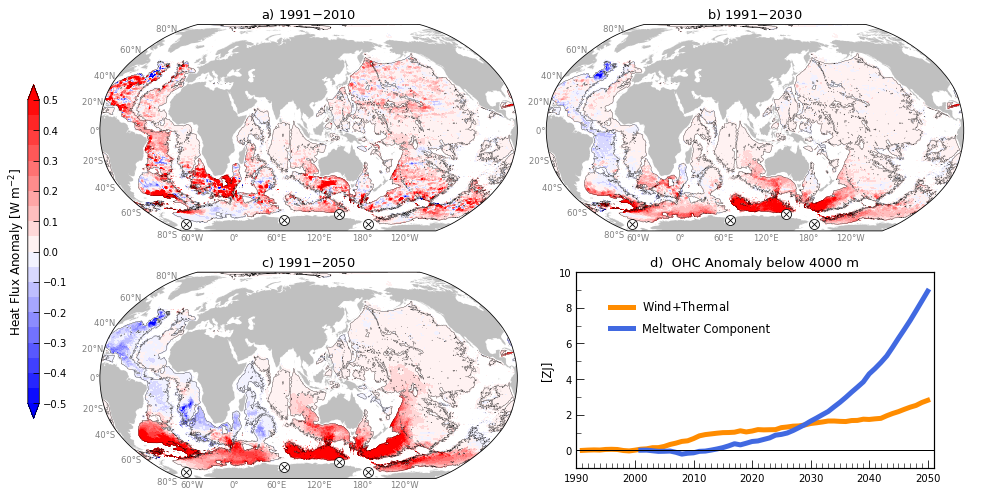

In [6]:
make_plot4_Robinson_FIG(dTdt_DZT_4km_Decadal[0,:,:,:],levs_temp,unit_temp,colormap_temp,PI)